In [54]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\clint\Desktop\Lifecycle_RA\Data\Processed\Combined_Csvs\combined_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data

,Date,4YO,5YO,3-5YO Avg.,Source_File,3YO,3-5YO Avg,2YO
0,2015-01-01,79700,69700,77800,02_2018.csv,NaN,NaN,NaN
1,2015-01-01,78000,70000,79000,03_2018.csv,NaN,NaN,NaN
2,2015-01-01,78000,70000,80000,04_2018.csv,NaN,NaN,NaN
3,2015-01-01,78000,70000,80000,08_2018.csv,NaN,NaN,NaN
4,2015-01-01,78000,70000,85000,05_2018.csv,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2115,2024-09-01,54000,41000,NaN,03_2025.csv,93000.0,NaN,NaN
2116,2024-09-01,73000,49000,NaN,01_2025.csv,94000.0,NaN,NaN
2117,2024-11-01,51000,43000,NaN,03_2025.csv,92000.0,NaN,NaN
2118,2024-11-01,58000,44000,NaN,01_2025.csv,84000.0,NaN,NaN


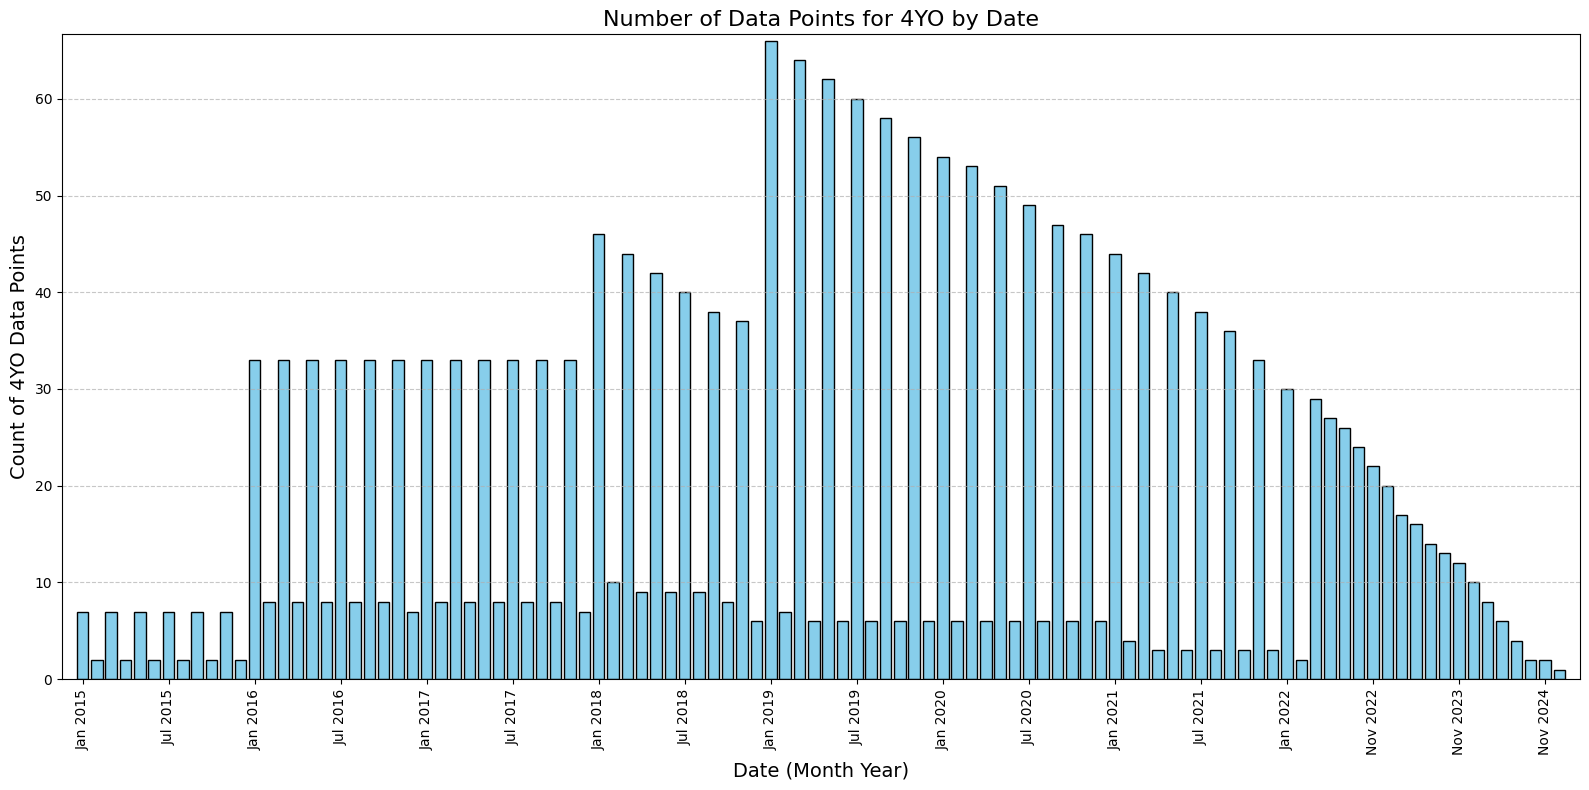

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Clean numeric columns by removing commas and converting to numeric
for col in ['2YO', '3YO', '4YO', '5YO', '3-5YO Avg', '3-5YO Avg.']:
    if col in data.columns:
        # Convert to string first to handle potential NaN values
        data[col] = data[col].astype(str).str.replace(',', '').replace('nan', np.nan)
        # Convert back to numeric
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Group by Date and count non-null values in the 4YO column
date_counts = data.groupby('Date')['4YO'].count().reset_index()

# Format the dates to show only month and year
date_counts['formatted_date'] = date_counts['Date'].dt.strftime('%b %Y')

# Plot the histogram with improved x-axis
plt.figure(figsize=(16, 8))

# Create bar chart with formatted dates
bars = plt.bar(range(len(date_counts)), date_counts['4YO'], color='skyblue', edgecolor='black')

# Only show a subset of x-ticks to prevent overcrowding (every 6 months)
tick_positions = range(0, len(date_counts), 6)
plt.xticks(tick_positions, [date_counts['formatted_date'][i] for i in tick_positions], rotation=90)

# Add labels and title
plt.title('Number of Data Points for 4YO by Date', fontsize=16)
plt.xlabel('Date (Month Year)', fontsize=14)
plt.ylabel('Count of 4YO Data Points', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set margins to give the plot more space
plt.margins(0.01)
plt.tight_layout()
plt.show()

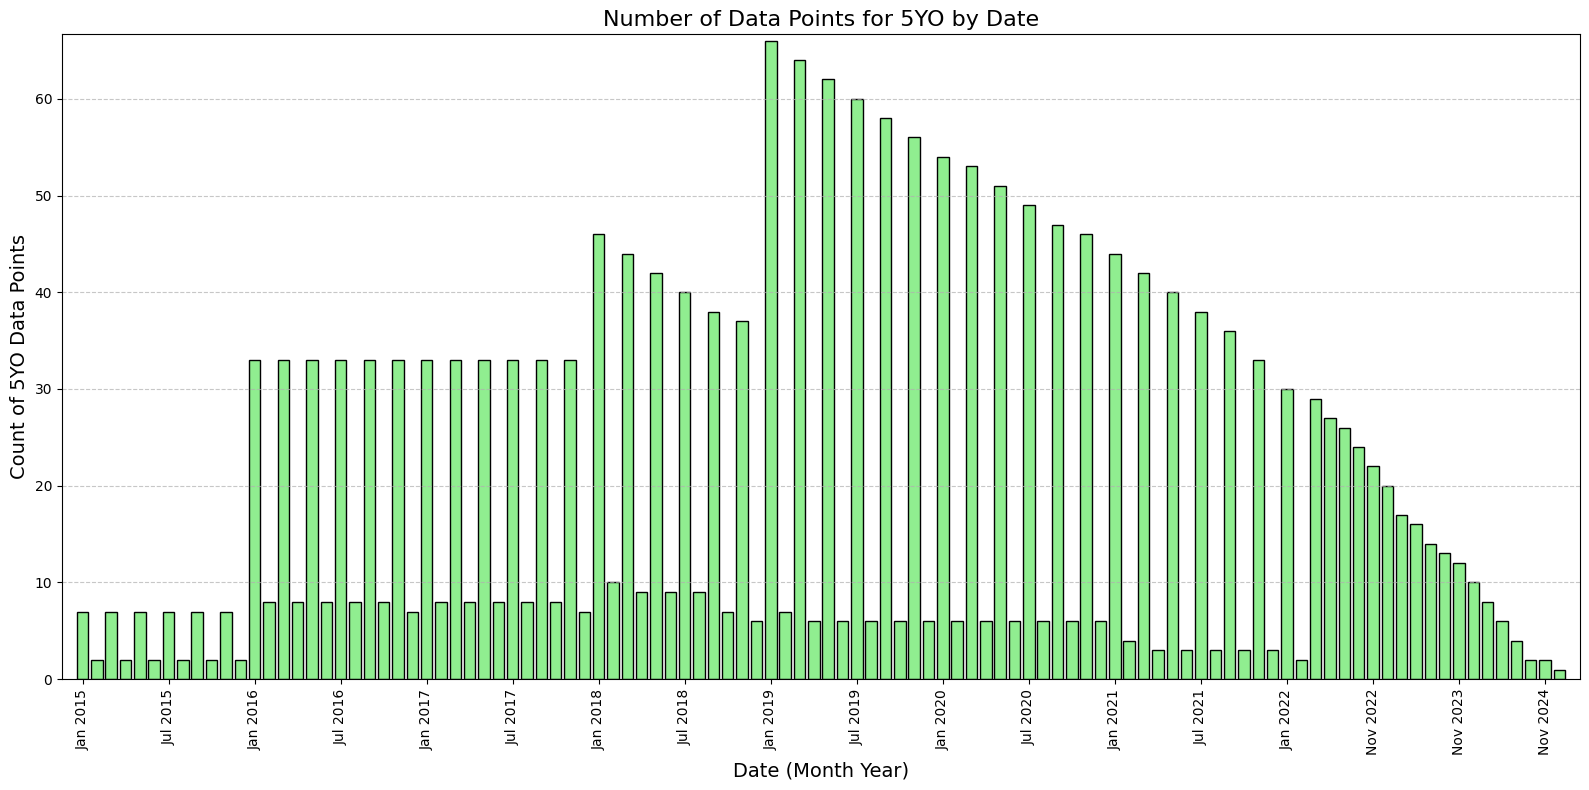

In [56]:
# Similar visualization for 5YO data
import matplotlib.pyplot as plt
import numpy as np

# Group by Date and count non-null values in the 5YO column
date_counts_5yo = data.groupby('Date')['5YO'].count().reset_index()

# Format the dates to show only month and year
date_counts_5yo['formatted_date'] = date_counts_5yo['Date'].dt.strftime('%b %Y')

# Plot the histogram with improved x-axis
plt.figure(figsize=(16, 8))

# Create bar chart with formatted dates
bars_5yo = plt.bar(range(len(date_counts_5yo)), date_counts_5yo['5YO'], color='lightgreen', edgecolor='black')

# Only show a subset of x-ticks to prevent overcrowding (every 6 months)
tick_positions = range(0, len(date_counts_5yo), 6)
plt.xticks(tick_positions, [date_counts_5yo['formatted_date'][i] for i in tick_positions], rotation=90)

# Add labels and title
plt.title('Number of Data Points for 5YO by Date', fontsize=16)
plt.xlabel('Date (Month Year)', fontsize=14)
plt.ylabel('Count of 5YO Data Points', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set margins to give the plot more space
plt.margins(0.01)
plt.tight_layout()
plt.show()

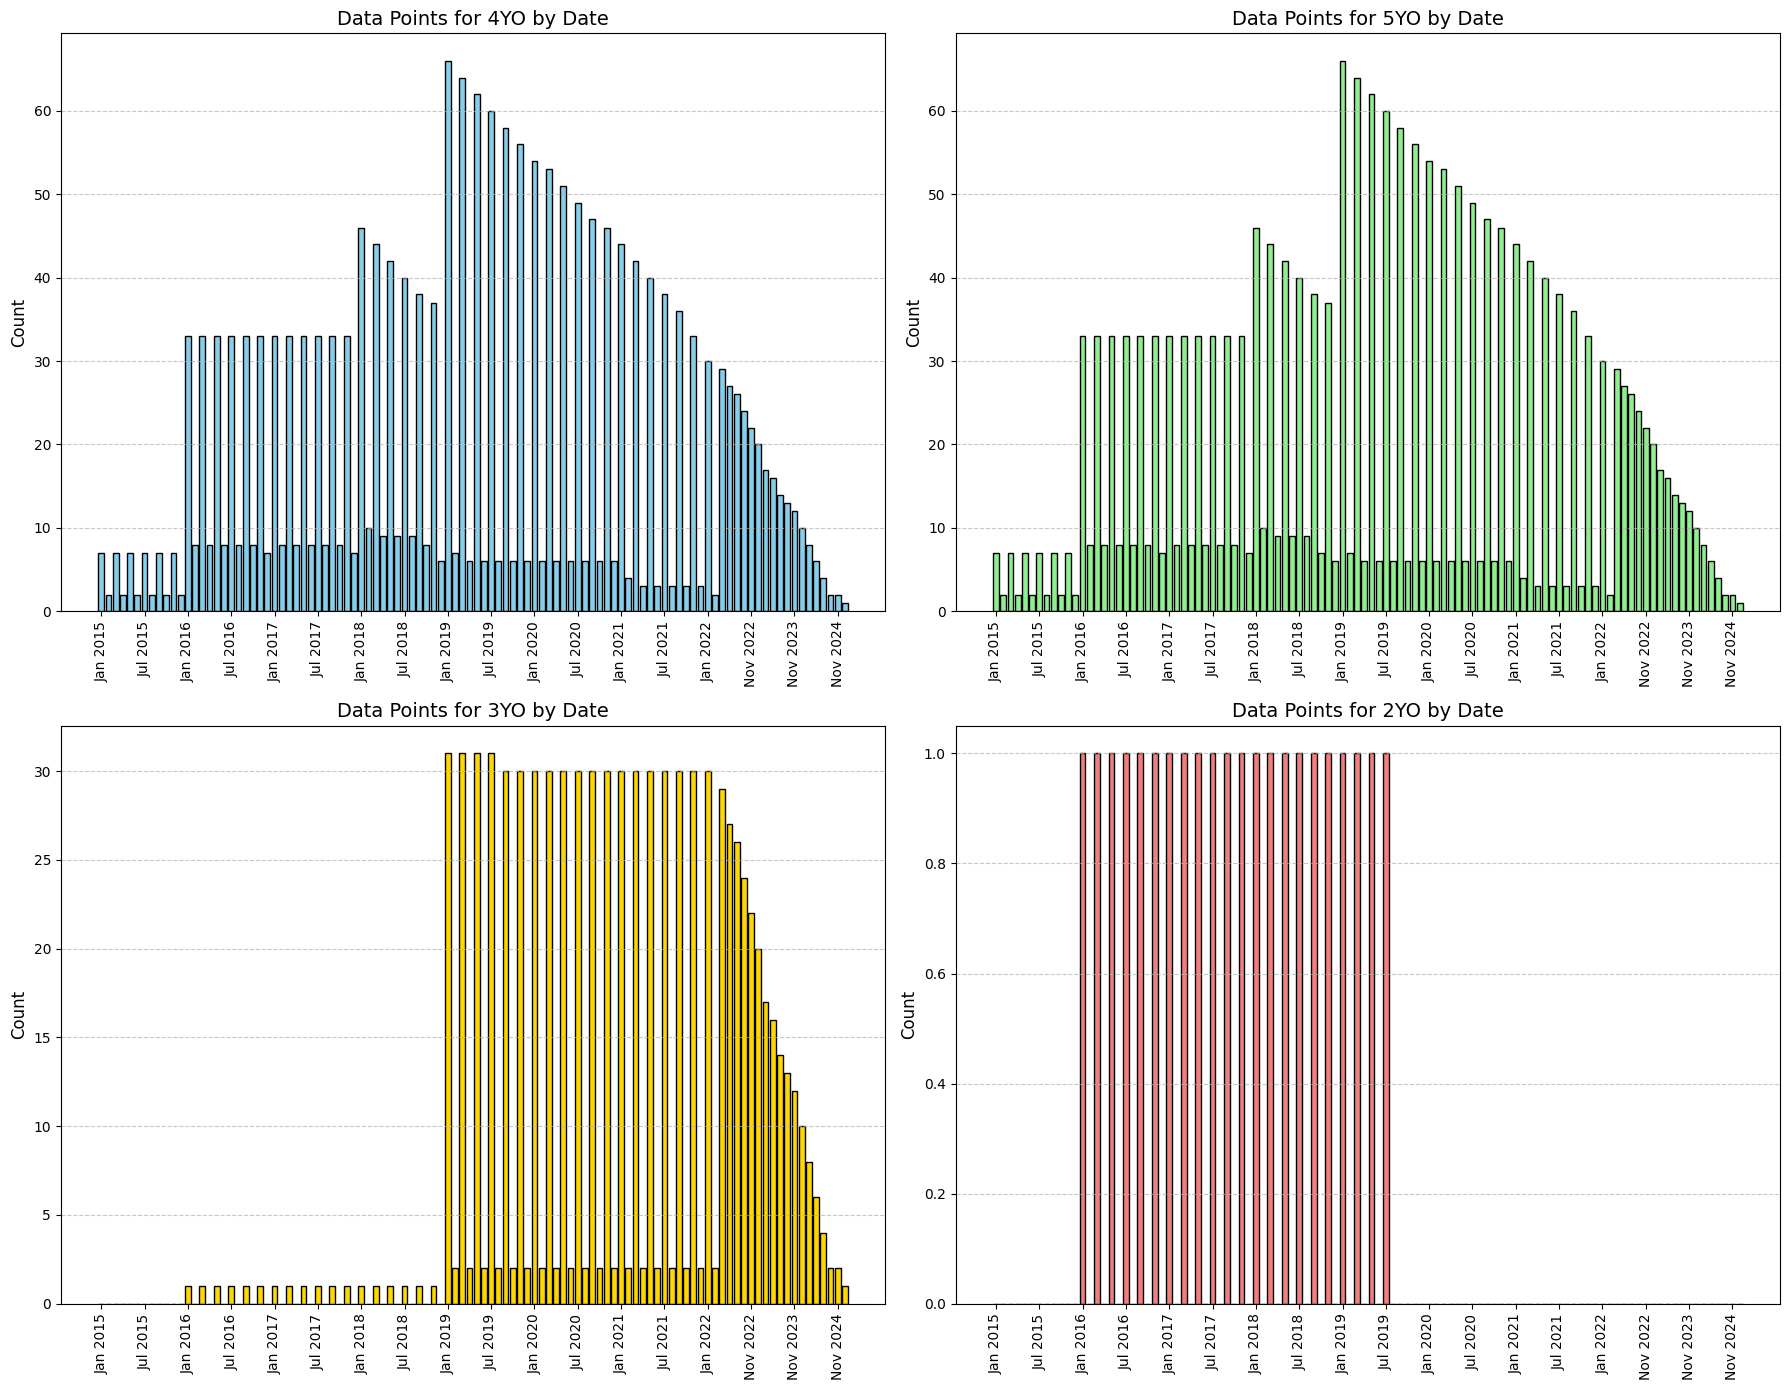

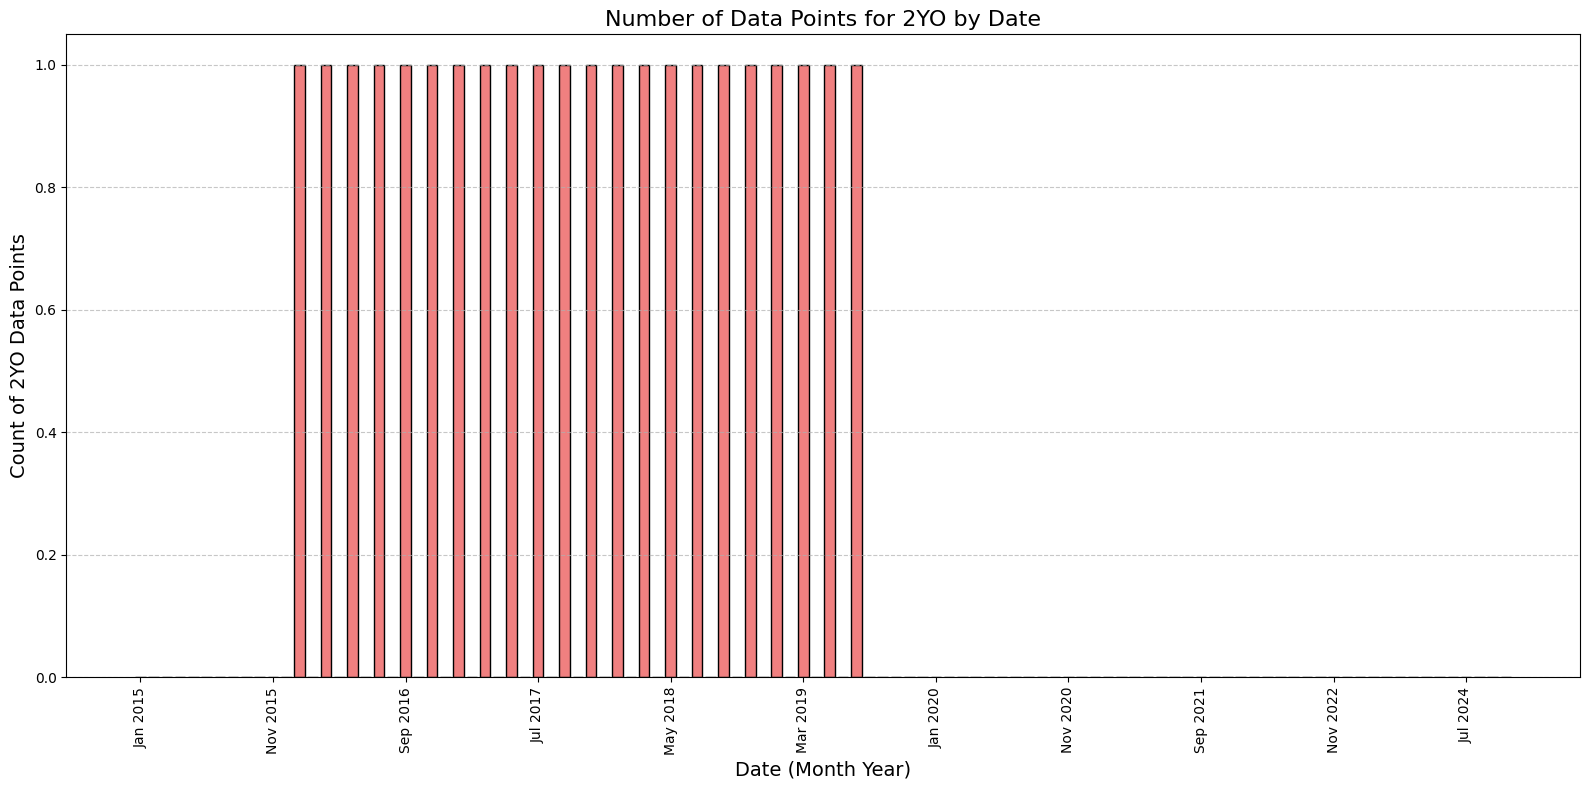

In [57]:
# Create visualizations for 3YO, 5YO, and 2YO data
import matplotlib.pyplot as plt
import numpy as np

# Function to generate count data for a specific column
def get_date_counts(column_name):
    # Check if column exists first to avoid errors
    if column_name in data.columns:
        counts = data.groupby('Date')[column_name].count().reset_index()
        counts['formatted_date'] = counts['Date'].dt.strftime('%b %Y')
        return counts
    else:
        print(f"Warning: Column '{column_name}' not found in data")
        return pd.DataFrame(columns=['Date', column_name, 'formatted_date'])

# Get counts for each age group
date_counts_3yo = get_date_counts('3YO')
date_counts_5yo = get_date_counts('5YO')
date_counts_2yo = get_date_counts('2YO')

# Create a 2x2 grid of subplots for all age groups
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

# Configure color scheme for consistency
colors = {
    '2YO': 'lightcoral',
    '3YO': 'gold',
    '4YO': 'skyblue',
    '5YO': 'lightgreen'
}

# Helper function to create a bar plot in a given axis
def plot_age_group(ax, date_counts, column_name):
    if column_name in date_counts.columns:
        ax.bar(range(len(date_counts)), date_counts[column_name], color=colors[column_name], edgecolor='black')
        ax.set_title(f'Data Points for {column_name} by Date', fontsize=14)
        ax.set_ylabel('Count', fontsize=12)
        tick_positions = range(0, len(date_counts), 6)
        ax.set_xticks(tick_positions)
        ax.set_xticklabels([date_counts['formatted_date'][i] for i in tick_positions], rotation=90)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    else:
        ax.text(0.5, 0.5, f'No data for {column_name}', ha='center', va='center', fontsize=14)
        ax.set_title(f'Data Points for {column_name} by Date', fontsize=14)

# Plot each age group
plot_age_group(axs[0, 0], date_counts, '4YO')  # 4YO in top-left
plot_age_group(axs[0, 1], date_counts_5yo, '5YO')  # 5YO in top-right
plot_age_group(axs[1, 0], date_counts_3yo, '3YO')  # 3YO in bottom-left
plot_age_group(axs[1, 1], date_counts_2yo, '2YO')  # 2YO in bottom-right

plt.tight_layout()
plt.show()

# Create a separate plot for 2YO since it has very few data points
if '2YO' in date_counts_2yo.columns and not date_counts_2yo.empty:
    plt.figure(figsize=(16, 8))
    plt.bar(range(len(date_counts_2yo)), date_counts_2yo['2YO'], color=colors['2YO'], edgecolor='black')
    plt.title('Number of Data Points for 2YO by Date', fontsize=16)
    plt.xlabel('Date (Month Year)', fontsize=14)
    plt.ylabel('Count of 2YO Data Points', fontsize=14)
    tick_positions = range(0, len(date_counts_2yo), max(1, len(date_counts_2yo) // 10))
    plt.xticks(tick_positions, [date_counts_2yo['formatted_date'][i] for i in tick_positions], rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Time-Based Box Plot Analysis: 3YO vs 4YO vs 5YO

This section extends our analysis to include 3YO, 4YO, and 5YO data for a more comprehensive age group comparison.

In [58]:
# Prepare data for 3YO, 4YO, and 5YO comparison
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Create dataframes for each age group
data_3yo = data.dropna(subset=['3YO']).copy()
data_4yo = data.dropna(subset=['4YO']).copy()
data_5yo = data.dropna(subset=['5YO']).copy()

# Create Year-Quarter column from Date
data_3yo['Year-Quarter'] = data_3yo['Date'].dt.to_period('Q').astype(str)
data_4yo['Year-Quarter'] = data_4yo['Date'].dt.to_period('Q').astype(str)
data_5yo['Year-Quarter'] = data_5yo['Date'].dt.to_period('Q').astype(str)

# Count data points per quarter for each age group
quarter_counts_3yo = data_3yo.groupby('Year-Quarter')['3YO'].count()
quarter_counts_4yo = data_4yo.groupby('Year-Quarter')['4YO'].count()
quarter_counts_5yo = data_5yo.groupby('Year-Quarter')['5YO'].count()

valid_quarters_3yo = quarter_counts_3yo[quarter_counts_3yo >= 3].index.tolist()
valid_quarters_4yo = quarter_counts_4yo[quarter_counts_4yo >= 3].index.tolist()
valid_quarters_5yo = quarter_counts_5yo[quarter_counts_5yo >= 3].index.tolist()

print(f"Quarters with at least 3 data points for 3YO: {len(valid_quarters_3yo)}")
print(f"Quarters with at least 3 data points for 4YO: {len(valid_quarters_4yo)}")
print(f"Quarters with at least 3 data points for 5YO: {len(valid_quarters_5yo)}")

# Filter data for valid quarters
data_3yo_filtered = data_3yo[data_3yo['Year-Quarter'].isin(valid_quarters_3yo)]
data_4yo_filtered = data_4yo[data_4yo['Year-Quarter'].isin(valid_quarters_4yo)]
data_5yo_filtered = data_5yo[data_5yo['Year-Quarter'].isin(valid_quarters_5yo)]

# Create melted dataframe for each age group (ensure numeric values)
melted_3yo = data_3yo_filtered[['Year-Quarter', '3YO']].copy()
melted_3yo['Age_Group'] = '3YO'
melted_3yo.rename(columns={'3YO': 'Value'}, inplace=True)

melted_4yo = data_4yo_filtered[['Year-Quarter', '4YO']].copy()
melted_4yo['Age_Group'] = '4YO'
melted_4yo.rename(columns={'4YO': 'Value'}, inplace=True)

melted_5yo = data_5yo_filtered[['Year-Quarter', '5YO']].copy()
melted_5yo['Age_Group'] = '5YO'
melted_5yo.rename(columns={'5YO': 'Value'}, inplace=True)

# Ensure Value is numeric in all melted dataframes
melted_3yo['Value'] = pd.to_numeric(melted_3yo['Value'], errors='coerce')
melted_4yo['Value'] = pd.to_numeric(melted_4yo['Value'], errors='coerce')
melted_5yo['Value'] = pd.to_numeric(melted_5yo['Value'], errors='coerce')

# Combine all three age groups
combined_melted_all = pd.concat([melted_3yo, melted_4yo, melted_5yo], ignore_index=True)

# Print the shape of our combined data
print(f"Combined data shape for all three age groups: {combined_melted_all.shape}")
print(f"Number of data points per age group:")
print(combined_melted_all['Age_Group'].value_counts())

Quarters with at least 3 data points for 3YO: 23
Quarters with at least 3 data points for 4YO: 39
Quarters with at least 3 data points for 5YO: 39
Combined data shape for all three age groups: (5091, 3)
Number of data points per age group:
Age_Group
4YO    2115
5YO    2114
3YO     862
Name: count, dtype: int64


Number of quarters with sufficient data for all three age groups: 23
Common quarters: ['2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3']


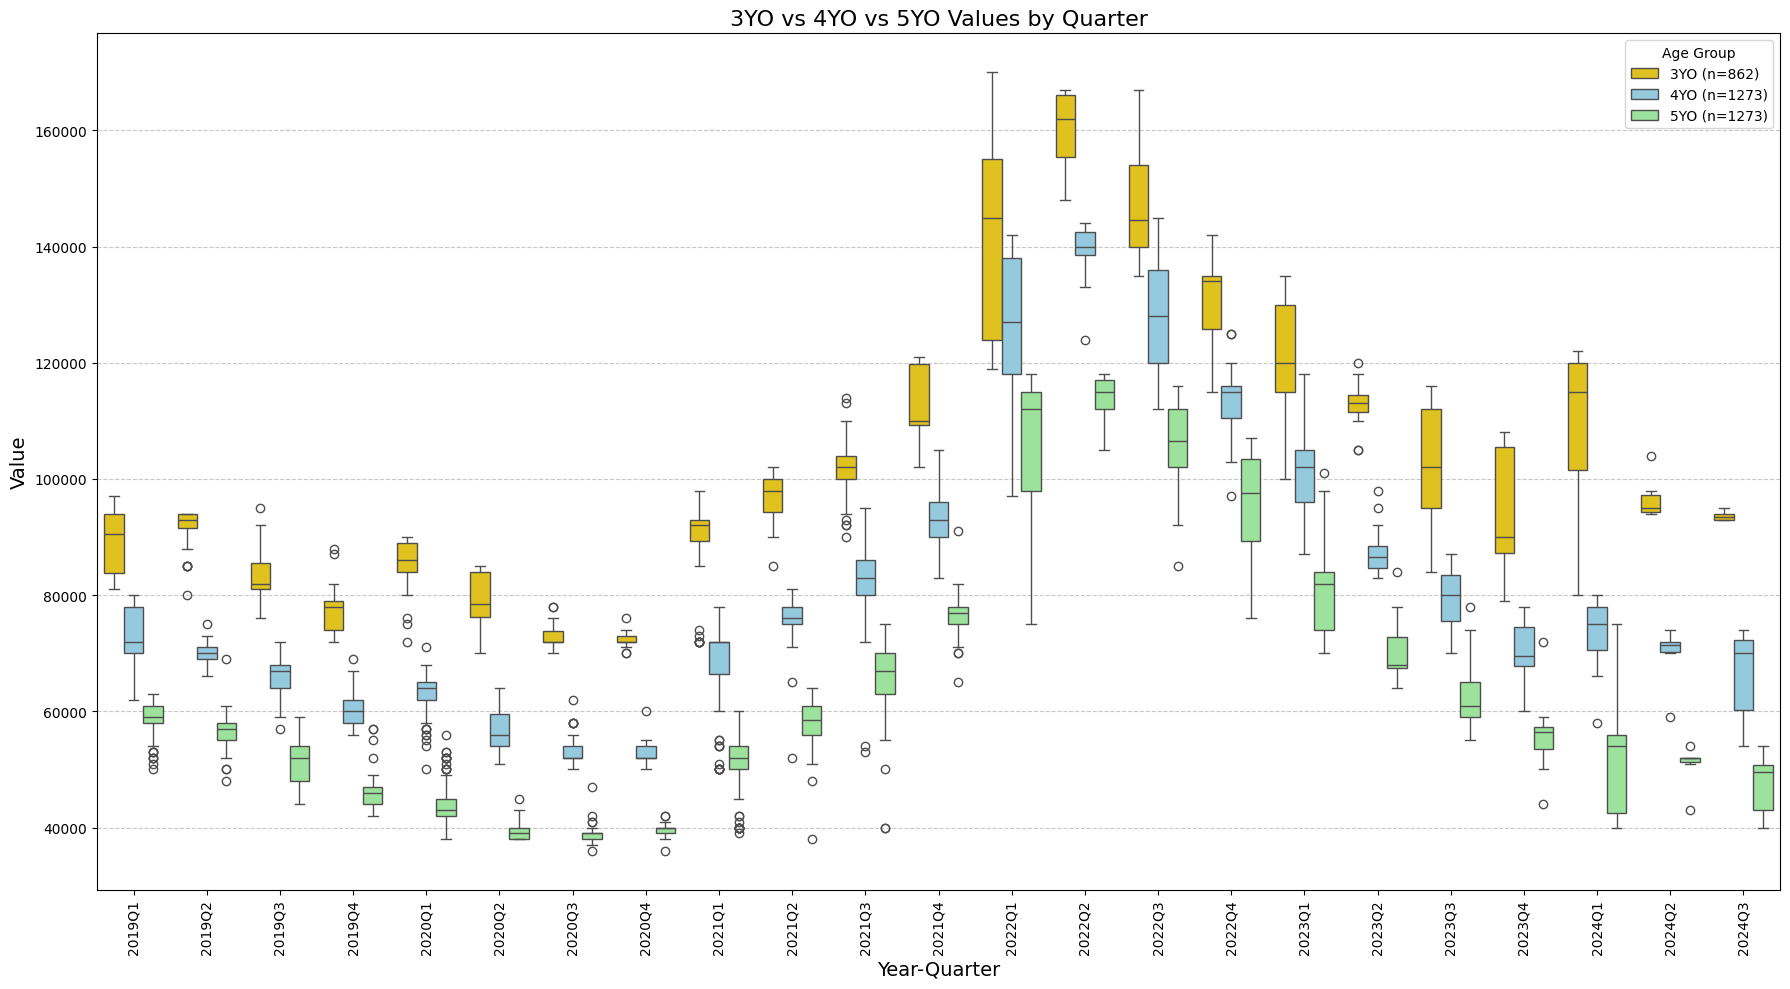

In [59]:
# Find common quarters where all three age groups have sufficient data
common_quarters_all = sorted(set(valid_quarters_3yo) & set(valid_quarters_4yo) & set(valid_quarters_5yo))
print(f"Number of quarters with sufficient data for all three age groups: {len(common_quarters_all)}")
print(f"Common quarters: {common_quarters_all}")

# Filter data for common quarters
if len(common_quarters_all) >= 1:
    common_data_all = combined_melted_all[combined_melted_all['Year-Quarter'].isin(common_quarters_all)]
    
    # Create time-based box plots
    plt.figure(figsize=(18, 10))
    
    # Create the box plot with quarter on x-axis, split by age group
    ax = sns.boxplot(x='Year-Quarter', y='Value', hue='Age_Group', 
                    data=common_data_all, 
                    palette={"3YO": colors['3YO'], "4YO": colors['4YO'], "5YO": colors['5YO']})
    
    # Customize the plot
    plt.title('3YO vs 4YO vs 5YO Values by Quarter', fontsize=16)
    plt.xlabel('Year-Quarter', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate x-tick labels for better readability
    plt.xticks(rotation=90)
    
    # Add data point counts to the legend
    handles, labels = ax.get_legend_handles_labels()
    counts = common_data_all.groupby('Age_Group').size()
    labels = [f"{label} (n={counts[label]})" for label in labels]
    plt.legend(handles, labels, title="Age Group")
    
    plt.tight_layout()
    plt.show()
else:
    print("Not enough common quarters with sufficient data for all three age groups comparison.")
    
    # In case we don't have common quarters for all three groups,
    # let's try pairs of age groups
    print("\nAnalyzing pairs of age groups instead:")
    
    # 3YO and 4YO
    common_3yo_4yo = sorted(set(valid_quarters_3yo) & set(valid_quarters_4yo))
    print(f"Common quarters for 3YO and 4YO: {len(common_3yo_4yo)}")
    
    # 3YO and 5YO
    common_3yo_5yo = sorted(set(valid_quarters_3yo) & set(valid_quarters_5yo))
    print(f"Common quarters for 3YO and 5YO: {len(common_3yo_5yo)}")
    
    # 4YO and 5YO
    common_4yo_5yo = sorted(set(valid_quarters_4yo) & set(valid_quarters_5yo))
    print(f"Common quarters for 4YO and 5YO: {len(common_4yo_5yo)}")

In [60]:
# Prepare data for all four age groups comparison
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Create dataframe for 2YO (which we haven't fully processed in previous cells)
data_2yo = data.dropna(subset=['2YO']).copy()

# Create Year-Quarter column for 2YO data
data_2yo['Year-Quarter'] = data_2yo['Date'].dt.to_period('Q').astype(str)

# Count data points per quarter for 2YO
quarter_counts_2yo = data_2yo.groupby('Year-Quarter')['2YO'].count()
valid_quarters_2yo = quarter_counts_2yo[quarter_counts_2yo >= 1].index.tolist()  # Using 1 instead of 3 due to limited 2YO data

print(f"Quarters with at least 1 data point for 2YO: {len(valid_quarters_2yo)}")

# Filter data for valid quarters
data_2yo_filtered = data_2yo[data_2yo['Year-Quarter'].isin(valid_quarters_2yo)]

# Create melted dataframe for 2YO
melted_2yo = data_2yo_filtered[['Year-Quarter', '2YO']].copy()
melted_2yo['Age_Group'] = '2YO'
melted_2yo.rename(columns={'2YO': 'Value'}, inplace=True)

# Ensure Value is numeric in the 2YO dataframe
melted_2yo['Value'] = pd.to_numeric(melted_2yo['Value'], errors='coerce')

# Combine all four age groups
combined_melted_all = pd.concat([melted_2yo, melted_3yo, melted_4yo, melted_5yo], ignore_index=True)

# Print the shape of our combined data
print(f"Combined data shape for all four age groups: {combined_melted_all.shape}")
print(f"Number of data points per age group:")
print(combined_melted_all['Age_Group'].value_counts())

Quarters with at least 1 data point for 2YO: 15
Combined data shape for all four age groups: (5113, 3)
Number of data points per age group:
Age_Group
4YO    2115
5YO    2114
3YO     862
2YO      22
Name: count, dtype: int64


C:\Users\clint\AppData\Local\Temp\ipykernel_54524\1566458725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='Value', data=combined_melted_all,


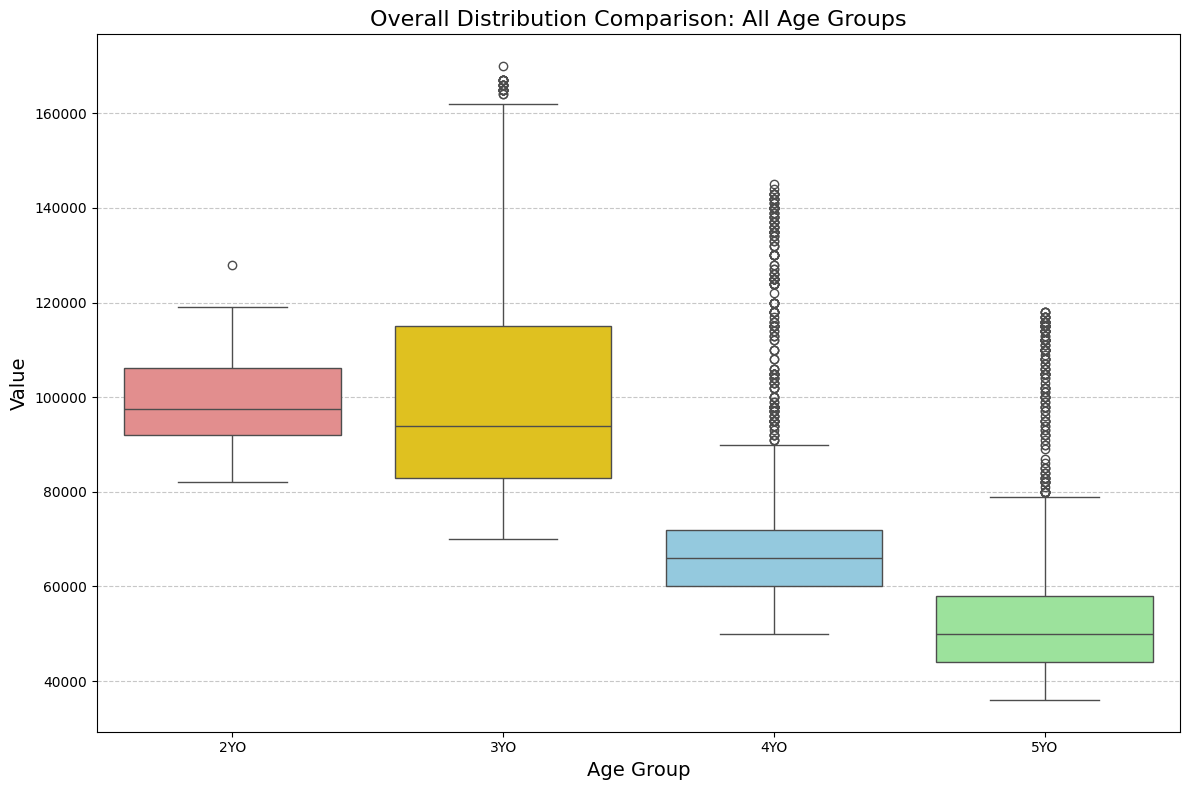

Summary Statistics:
           count           mean   median           std      min       max
Age_Group                                                                
2YO           22   99318.181818  97500.0  11877.896093  82000.0  128000.0
3YO          862  101429.234339  94000.0  25640.306160  70000.0  170000.0
4YO         2115   70732.056738  66000.0  19190.031197  50000.0  145000.0
5YO         2114   55020.009461  50000.0  17535.290407  36000.0  118000.0

One-way ANOVA results comparing 2YO, 3YO, 4YO, 5YO:
F-statistic: 1146.6875
p-value: 0.0000000000
Statistically significant difference among the groups: True

Tukey's HSD Post-hoc Test Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   2YO    3YO   2111.0525 0.9603  -8859.2507  13081.3558  False
   2YO    4YO -28586.1251    0.0 -39475.2557 -17696.9944   True
   2YO    5YO -44298.1

In [61]:
# Create overall box plots comparing all three age groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age_Group', y='Value', data=combined_melted_all, 
            palette={'2YO': colors['2YO'], '3YO': colors['3YO'], '4YO': colors['4YO'], '5YO': colors['5YO']},
            order=['2YO', '3YO', '4YO', '5YO'])

plt.title('Overall Distribution Comparison: All Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis to show in thousands
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Calculate and print summary statistics
summary_stats_all = combined_melted_all.groupby('Age_Group')['Value'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print("Summary Statistics:")
print(summary_stats_all)

# Perform ANOVA to check if there are significant differences among the groups
groups = [combined_melted_all[combined_melted_all['Age_Group'] == group]['Value'].dropna() 
          for group in ['2YO', '3YO', '4YO', '5YO'] if len(combined_melted_all[combined_melted_all['Age_Group'] == group]) > 0]
group_names = [group for group in ['2YO', '3YO', '4YO', '5YO'] if len(combined_melted_all[combined_melted_all['Age_Group'] == group]) > 0]

if len(groups) >= 2:  # Need at least 2 groups for ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"\nOne-way ANOVA results comparing {', '.join(group_names)}:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_value:.10f}")
    print(f"Statistically significant difference among the groups: {p_value < 0.05}")
    
    # Perform post-hoc tests if we have at least 3 groups
    if len(groups) >= 3:
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        
        # Prepare data for Tukey's test
        tukey_data = combined_melted_all.dropna(subset=['Value']).copy()
        
        # Perform Tukey's test
        tukey = pairwise_tukeyhsd(endog=tukey_data['Value'], groups=tukey_data['Age_Group'], alpha=0.05)
        print("\nTukey's HSD Post-hoc Test Results:")
        print(tukey)
else:
    print("\nInsufficient data for ANOVA across age groups.")